### Nathan Reed
### Project Milestone 1, 2, and 3
### Prof. Werner
### 08/12/2023

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline
churn_df = pd.read_csv('Customer-Churn-Records.csv')
churn_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


# Project Milestone 1

The business problem that I am wanting solve is the reason for churn. I am going to do this with data that I found on Kaggle about bank customer churn. While this may not work perfectly for businesses outside of banks, it should give an indication of what causes churn or what kind of customer is more likely to leave. The target will be the variable exited as it is the determining factor on whether a client has left or not. 

[Text(0.5, 1.0, 'Boxplot of Exited Vs. Tenure')]

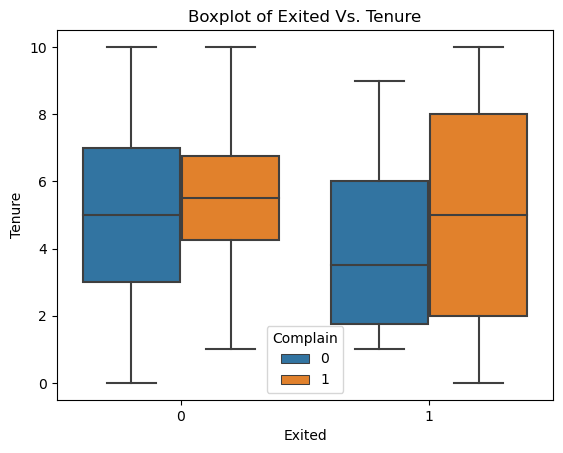

In [2]:
sns.boxplot(x ='Exited', y ='Tenure', data = churn_df, hue ='Complain').set(title='Boxplot of Exited Vs. Tenure')

From this first graph, we can see that there is a greater portion of people complaining when they exited than when they did not exit. This could lead us to believe that companies need to spend more time on those who complain so they can try to get people to stay and not leave. The tenure does not seem to be a key indicator either way for this data. We can also see a big portion of people leaving but never complaining. This could lead us to ask clients how we are doing more often and conducting more surveys.

[Text(0.5, 1.0, 'Complain Vs. Count')]

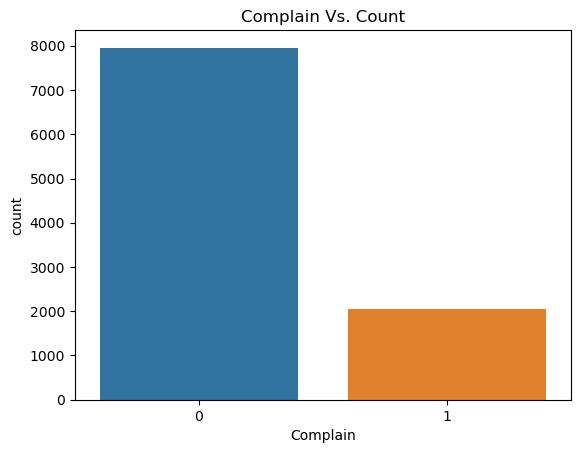

In [3]:
sns.countplot(x ='Complain', data = churn_df).set(title='Complain Vs. Count')

We can tell from this graph that generally people do no complain to the company. This is a good sign, because it means people are generally happy with how the bank is doing and only very rarely do they have a complaint.

[Text(0.5, 1.0, 'Boxplot of Exited Vs. Estimated Salary')]

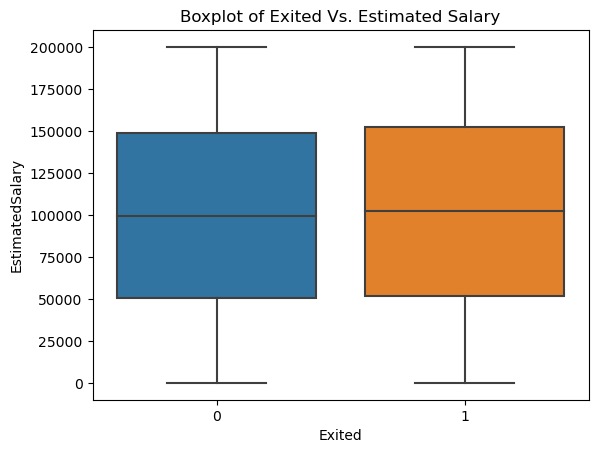

In [4]:
sns.boxplot(x ='Exited', y ='EstimatedSalary', data = churn_df).set(title='Boxplot of Exited Vs. Estimated Salary')

While there is not a major difference between those who exited and those who stayed when comparing salary, I did find it strange that those who exited on average made a bit more money than those who did not leave. I thought that more people would leave a bank due to having less money rather than having more money. This could be a result of the customer being less than satisfied with the service they are receiving.

[Text(0.5, 1.0, 'Countplot of Exited')]

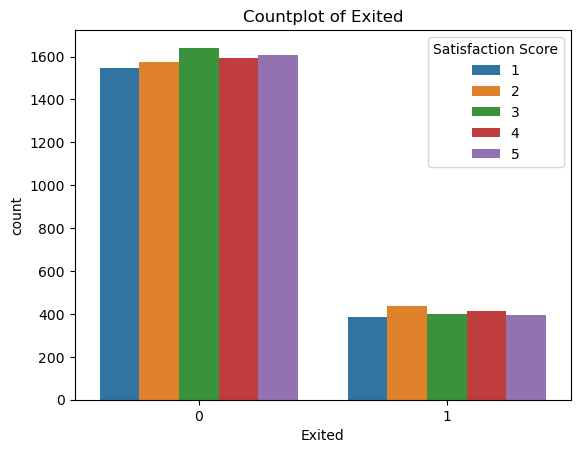

In [5]:
sns.countplot(x='Exited', hue='Satisfaction Score', data=churn_df).set(title='Countplot of Exited')

From this graph, we can tell that satisfaction score does not appear to be an important variable in determining whether someone exited. This could tell us that the current way we are doing surveys is not very useful and that there could be better ways of getting feedback.

Overall, from the graphs we can see that salary and satisfaction score are not key variables in determining why someone churned. Complain appears to be the variable with the most indication of determining churn.

# Project Milestone 2

Drop any features that are not useful for your model building and explain why they are not useful.

In [6]:
churn_df1 = churn_df.drop(churn_df.columns[[0,1,2]], axis = 1)
churn_df1.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


I decided to drop the RowNumber, Surname, and CustomerID. I decided to get rid of these columns as even if there is a significant difference, it wouldn't make any sense to apply a row number, surname, or Customer ID.

Deal with missing data (do not just drop rows or columns without justifying this).

In [7]:
churn_df1.isna().sum().sum()

0

There is no missing data in my dataset so there is nothing to deal with.

Create dummy variables if necessary.

In [8]:
churn_df2 = pd.get_dummies(churn_df1, columns = ['Geography', 'Gender', 'Card Type'])
churn_df2.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,...,Point Earned,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,619,42,2,0.00,1,1,1,101348.88,1,1,...,464,1,0,0,1,0,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,...,456,0,0,1,1,0,1,0,0,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,...,377,1,0,0,1,0,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,...,350,1,0,0,1,0,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,...,425,0,0,1,1,0,0,1,0,0


I created dummy variables for geography, gender, and card type. I did this because they were the only variables having strings in it and it made sense to make it a dummy variable.

Engineer new useful features.

I did not see any columns that I thought would be good to create and help with modeling so I left it alone.

The data from what I have seen is ready for modeling. There is nothing else that I see that needs any changes.

# Project Milestone 3

## Selecting the Model

I know my response variable is a categorical vairable so I need to be using a classification model. After I noticed this, I decided to use Logistic Regression and K Nearest Neighbor as my 2 models. I will then select the model that best fits the data based on accuracy and other factors.

## Building the Model

### Logistic Regression

In [9]:
X = churn_df2.drop('Exited', axis = 1)
Y = churn_df2['Exited']
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, random_state= 42)
logistic_regression = LogisticRegression(random_state = 42) 
logistic_regression.fit(X_train, Y_train)

LogisticRegression(random_state=42)

In [10]:
Y_pred = logistic_regression.predict(X_test)

### K Nearest Neighbor

In [11]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=10)

In [12]:
Y_pred1 = knn.predict(X_test)

## Evaluating the Model

### Logistic Regression

In [13]:
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred)
cnf_matrix

array([[1953,   50],
       [ 454,   43]], dtype=int64)

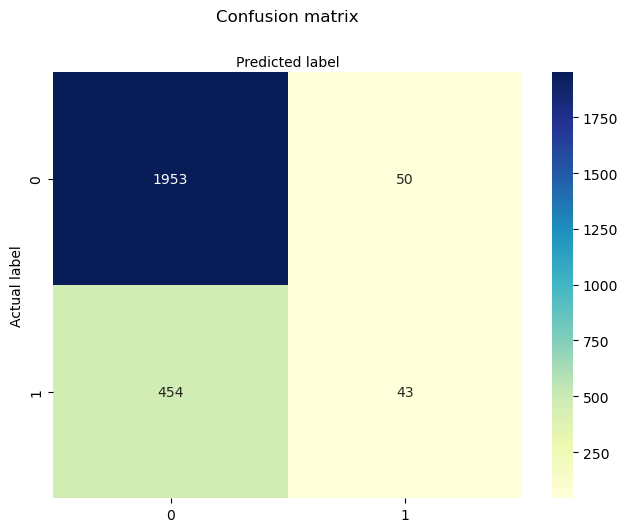

In [14]:
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label');

In [15]:
target_names = ['Stayed With Bank', 'Churned']
print(classification_report(Y_test, Y_pred, target_names=target_names))

                  precision    recall  f1-score   support

Stayed With Bank       0.81      0.98      0.89      2003
         Churned       0.46      0.09      0.15       497

        accuracy                           0.80      2500
       macro avg       0.64      0.53      0.52      2500
    weighted avg       0.74      0.80      0.74      2500



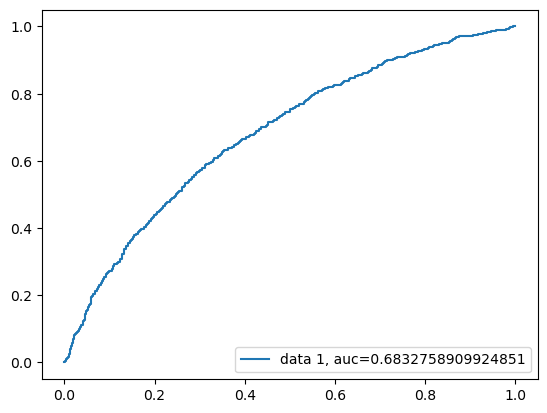

In [16]:
Y_pred_proba = logistic_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  Y_pred_proba)
auc = metrics.roc_auc_score(Y_test, Y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### K Nearest Neighbor

In [17]:
cnf_matrix1 = metrics.confusion_matrix(Y_test, Y_pred1)
cnf_matrix1

array([[1979,   24],
       [ 484,   13]], dtype=int64)

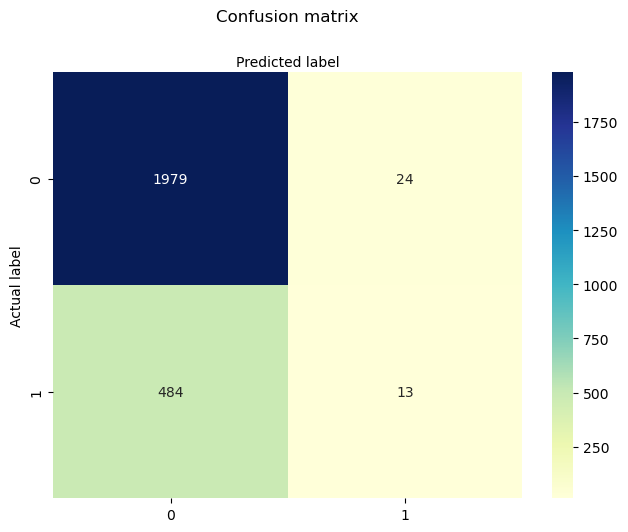

In [18]:
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix1), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label');

In [19]:
target_names = ['Stayed With Bank', 'Churned']
print(classification_report(Y_test, Y_pred1, target_names=target_names))

                  precision    recall  f1-score   support

Stayed With Bank       0.80      0.99      0.89      2003
         Churned       0.35      0.03      0.05       497

        accuracy                           0.80      2500
       macro avg       0.58      0.51      0.47      2500
    weighted avg       0.71      0.80      0.72      2500



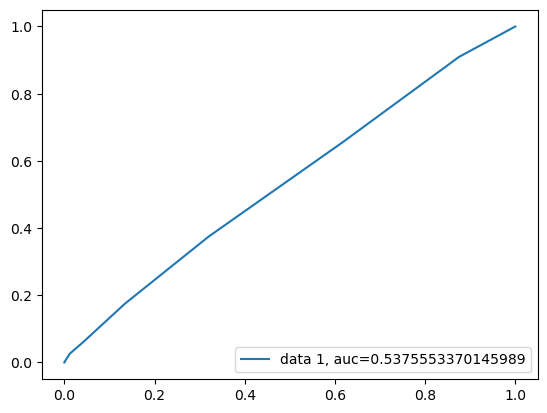

In [20]:
Y_pred_proba1 = knn.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  Y_pred_proba1)
auc = metrics.roc_auc_score(Y_test, Y_pred_proba1)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

From these 2 models, we can see that they are very similar and have very few differences. They both have the same accuracy and have relatively the same values for prescision, recall, and f1- score. I will end up using logistic regression because it has higher precision for churn and recall. Either way, there is not really a wrong answer due to the small change in these values. 